In [2]:
# Importing libraries to explore dataset, CSV files
import os
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Peek into the data by creating pandas dataframe

# type(pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-'))

stars_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

# First five
# stars_df.head()

# Random samples
stars_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
229,21738,748890.00000,92.0000,-7.346,4,Blue,O
125,3225,0.00076,0.1210,19.630,0,Red,M
74,3550,0.00400,0.2910,10.890,1,Red,M
217,19400,10920.00000,6.0300,-3.080,3,Blue-White,B
192,2994,0.00720,0.2800,13.450,1,Red,M
65,3295,0.00098,0.1320,17.130,0,Red,M
230,24145,382993.00000,1494.0000,-8.840,5,Blue-White,B
28,11790,0.00015,0.0110,12.590,2,Yellow-White,F
206,24020,0.00159,0.0127,10.550,2,Blue,B
160,25390,223000.00000,57.0000,-5.920,4,Blue,O


In [4]:
# Checking general information about the dataframe

stars_df.info()

# Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
# Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

# 0 → Brown Dwarf
# 1 → Red Dwarf
# 2 → White Dwarf
# 3 → Main Sequence
# 4 → Supergiants
# 5 → Hypergiants

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
# Creating a directory to save the visualizations

folder_name = 'stars_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'/content/{folder_name}/'

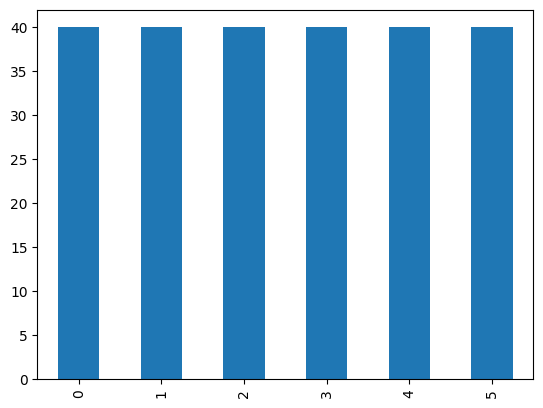

In [6]:
# Visualization of count of stars based on their types

stars_df['Star type'].value_counts().plot(kind='bar')
plt.show()

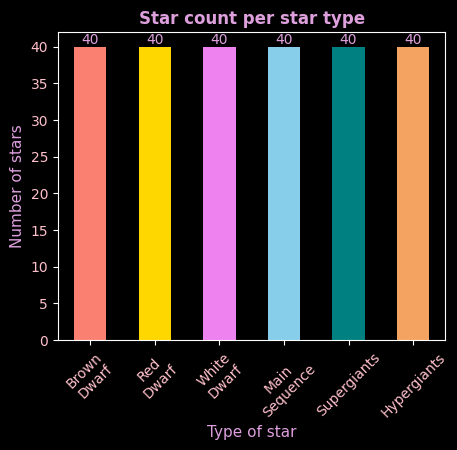

In [15]:
# Customization of plot with matplotlib
plt.figure(figsize=(5,4))
plt.style.use('dark_background')

ax = stars_df['Star type'].value_counts().plot(kind='bar', color=['salmon','gold','violet','skyblue','teal','sandybrown'])
ax.bar_label(ax.containers[0], color='plum')

# Title
plt.title('Star count per star type', color='plum', weight='bold')

# Ticks
plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           color='pink',
           rotation=45)
plt.yticks(color='pink')

# Labels
plt.xlabel('Type of star', color='plum',fontsize=11)
plt.ylabel('Number of stars', color='plum',fontsize=11)

plt.savefig(base_dir+'bar_star_count.png')
plt.show()


<ipython-input-8-6701bc0e6ec4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stars_df['Star color'].value_counts().index,


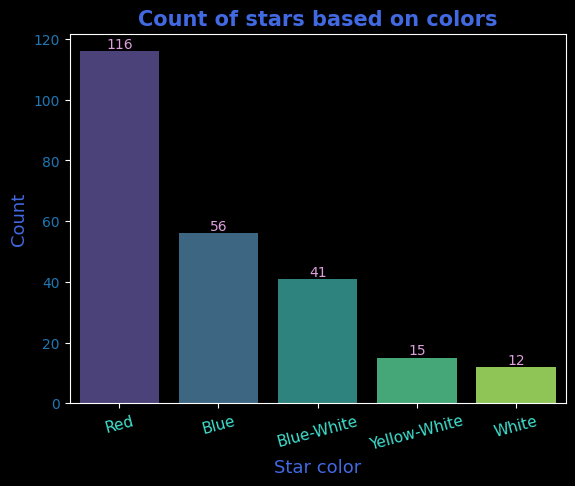

In [8]:
# Visualization with seaborn

# Star color data

ax = sns.barplot(x=stars_df['Star color'].value_counts().index,
            y=stars_df['Star color'].value_counts(),
            palette='viridis')

for container in ax.containers:
    ax.bar_label(container, color='plum', fontsize=10)


plt.title('Count of stars based on colors', color='royalblue', fontsize=15, weight='bold')

plt.xlabel('Star color',color='royalblue', fontsize=13)
plt.xticks(rotation=15, color='turquoise', fontsize=11)

plt.ylabel('Count',color='royalblue', fontsize=13)
plt.yticks(color='tab:blue')
plt.savefig(base_dir+'bar_star_color.png')
plt.show()




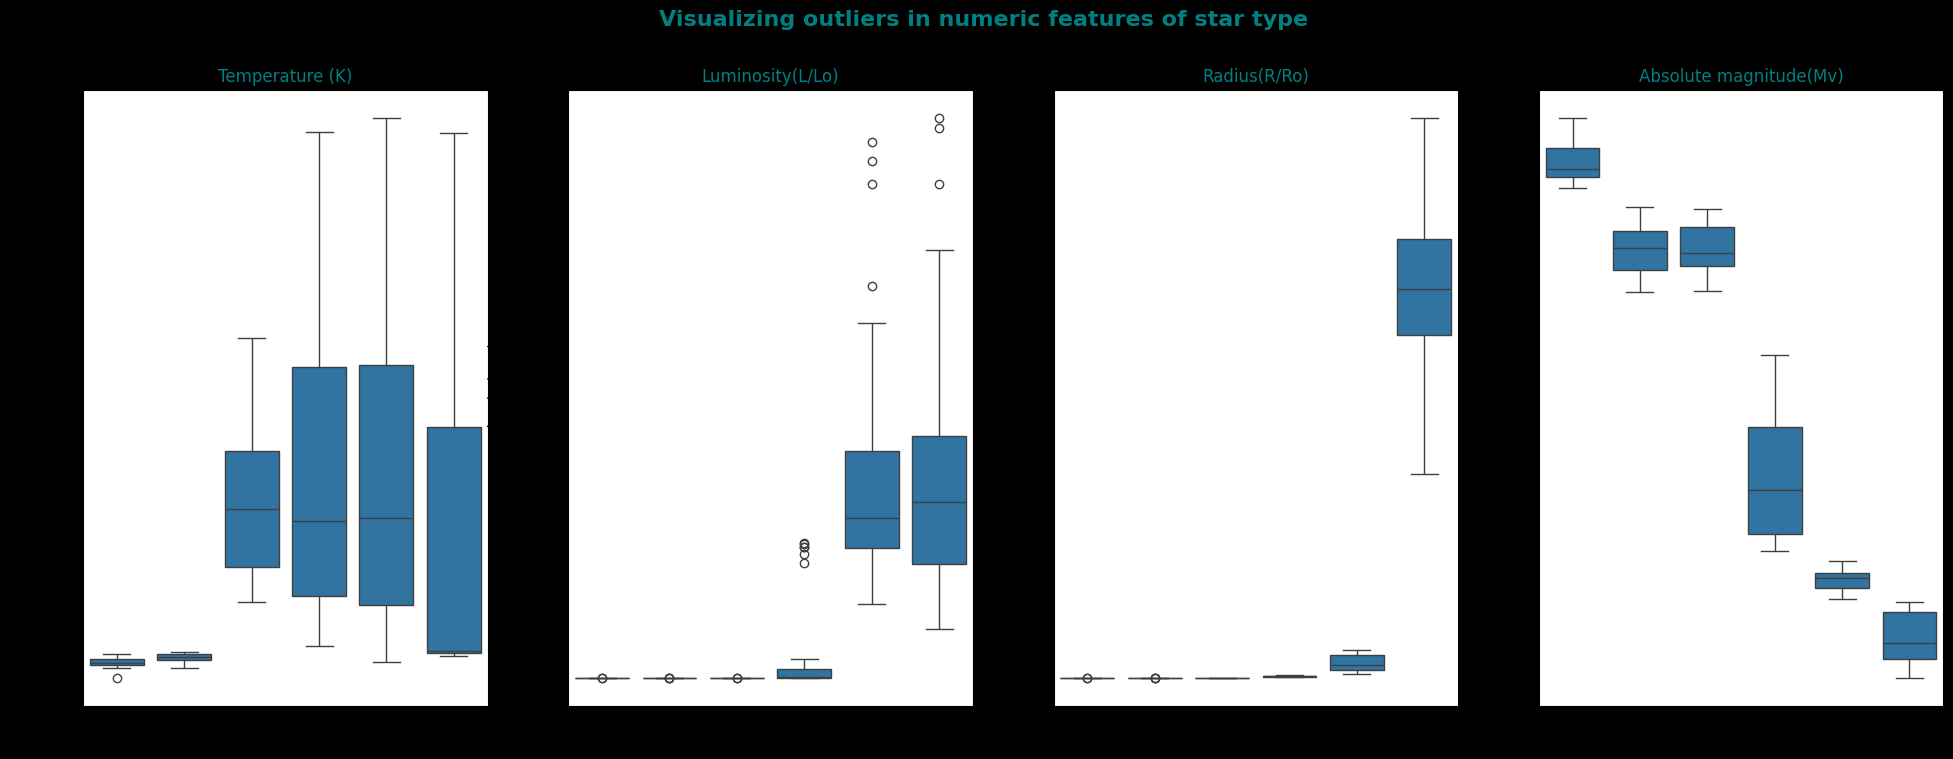

In [16]:
# Visualization of outliers in the data with boxplot
plt.figure(figsize=(24,8))
plt.style.use('default')
plt.suptitle('Visualizing outliers in numeric features of star type', color='teal', weight='bold', fontsize=16)

for i in range(4):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=stars_df['Star type'], y=stars_df.iloc[:, i])
  plt.title(stars_df.columns[i], color='teal')

  plt.savefig(base_dir+'box_star_type.png')


In [10]:
def line_subplot(stars_df,colors,i):
  plt.subplot(4,1,i+1)
  plt.plot(stars_df.iloc[:,i], color=colors[i])
  plt.title(stars_df.columns[i], color=colors[i])

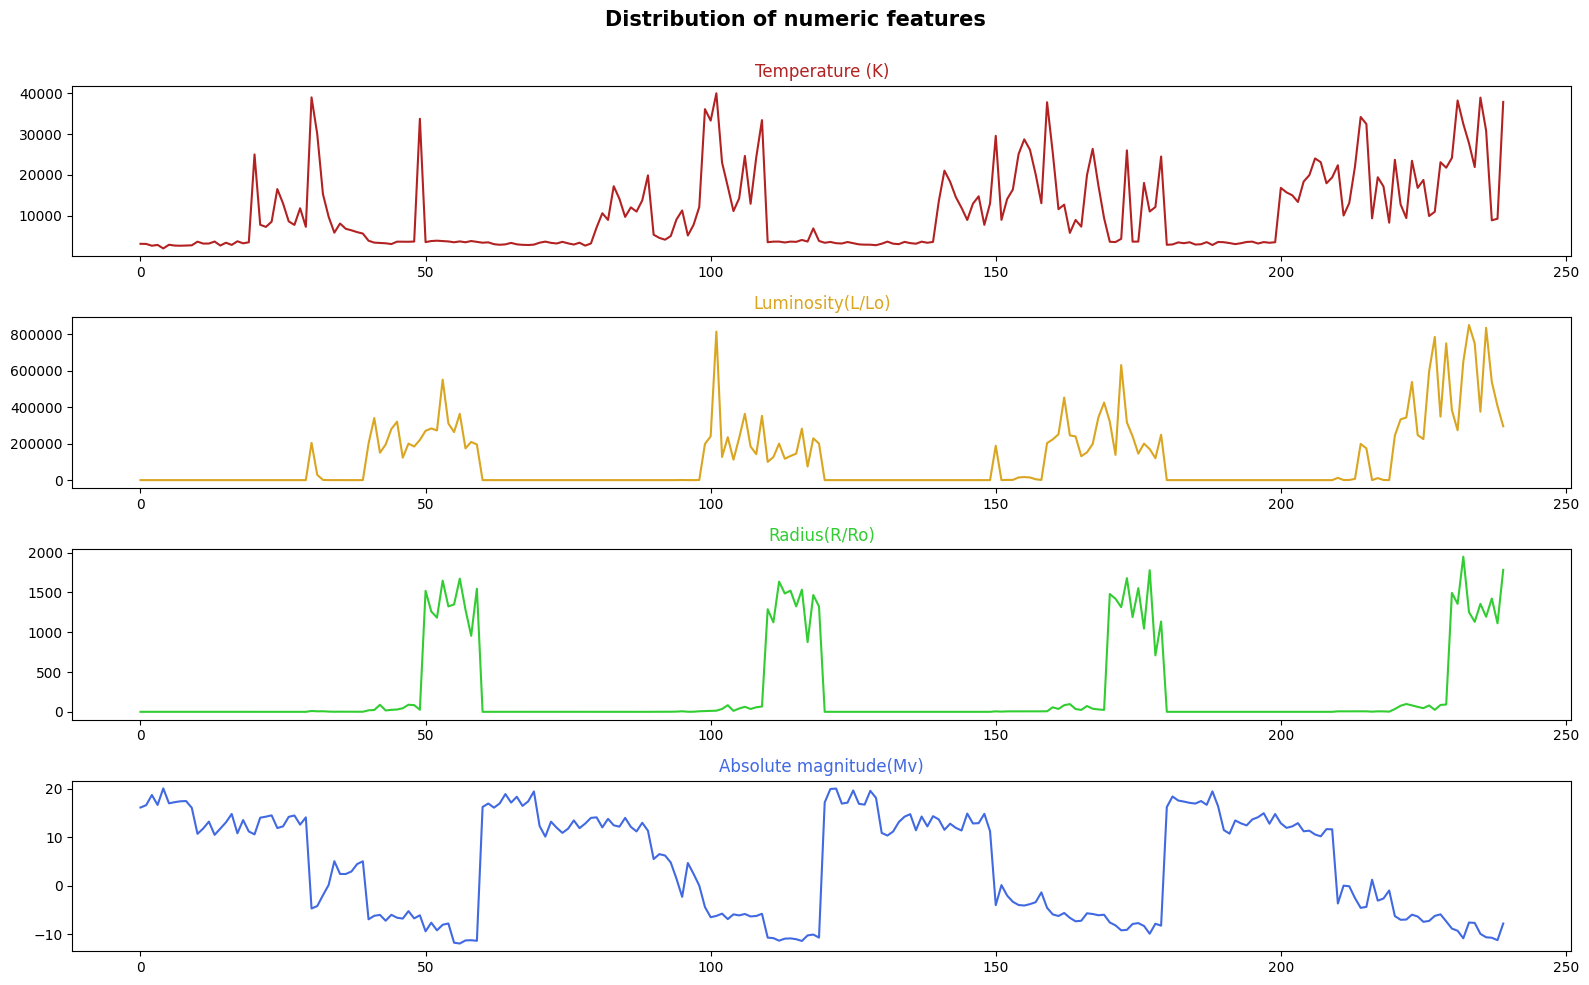

In [11]:
# Line Plots for visualizing the distribution values for each of the numeric features

colors=['firebrick','goldenrod','limegreen','royalblue']
plt.figure(figsize=(16,10))
plt.suptitle('Distribution of numeric features\n',weight='bold',fontsize=15)

for i in range(4):
  line_subplot(stars_df,colors,i)

plt.tight_layout()
plt.savefig(base_dir+'line_subplot.png')
plt.show()



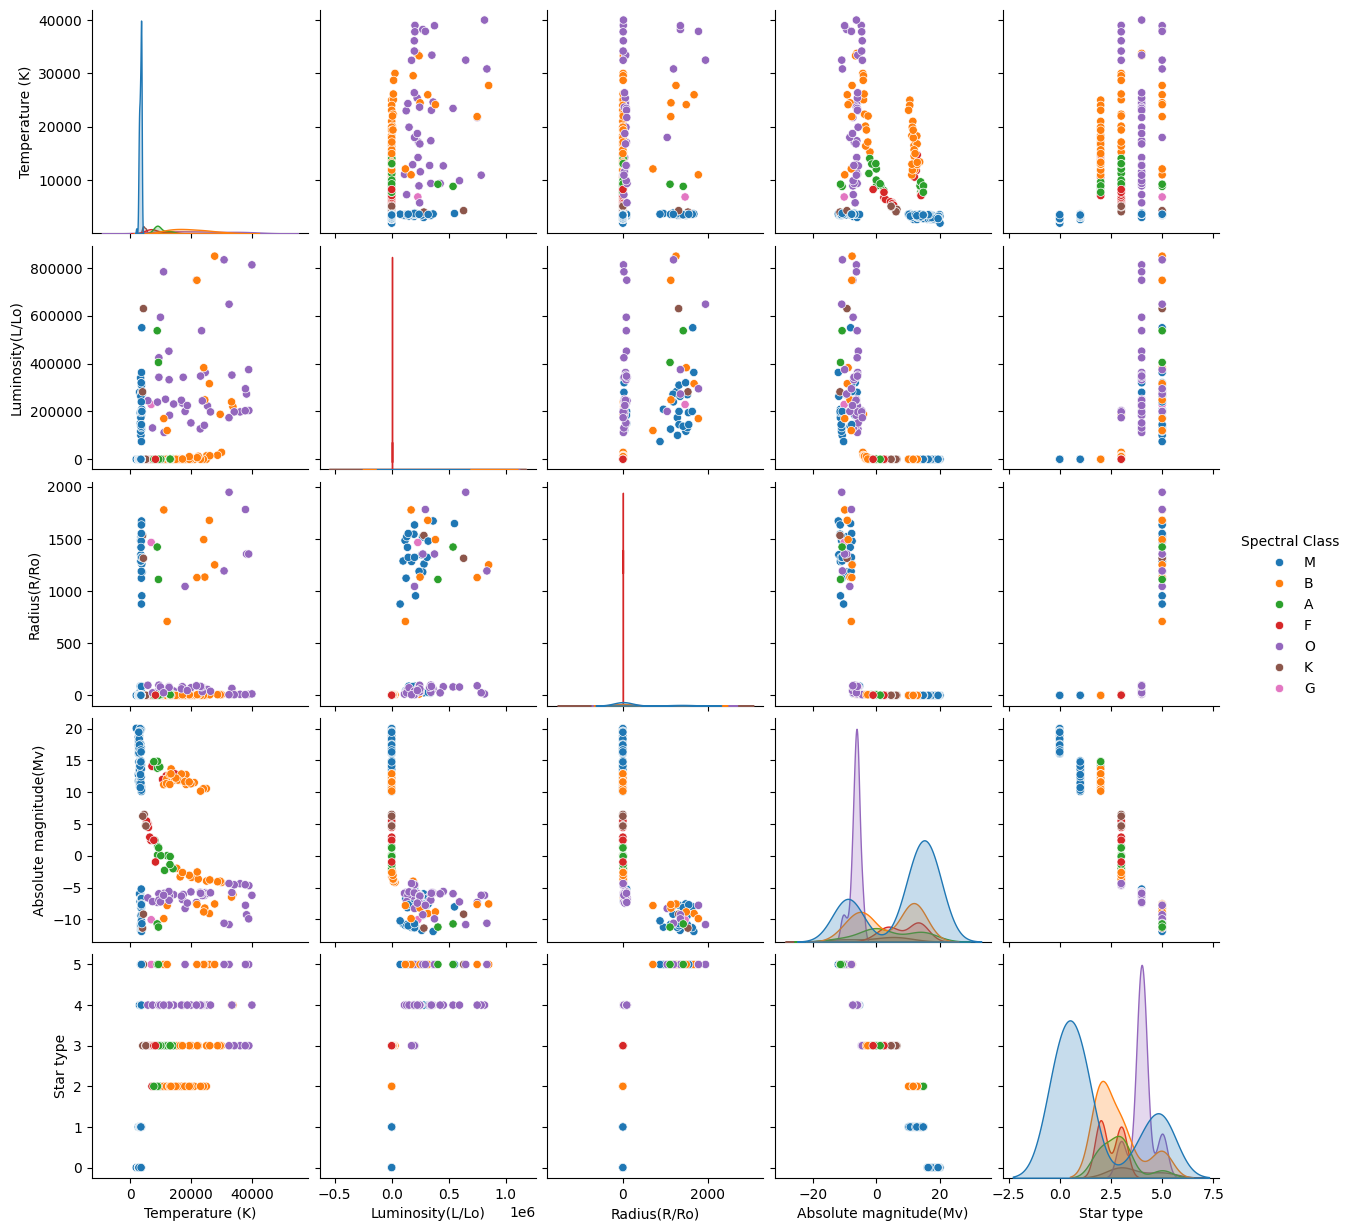

In [12]:
# Pairplot

sns.pairplot(stars_df, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show()

In [38]:
# HR diagram for Temperature vs Absolute Magnitude
star_type = stars_df['Star type'].values
temperature = stars_df['Temperature (K)'].values
abs_magnitude = stars_df['Absolute magnitude(Mv)'].values
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'whitesmoke', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'royalblue', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'mediumvioletred', 'size': 150, 'marker': 'o'}
}



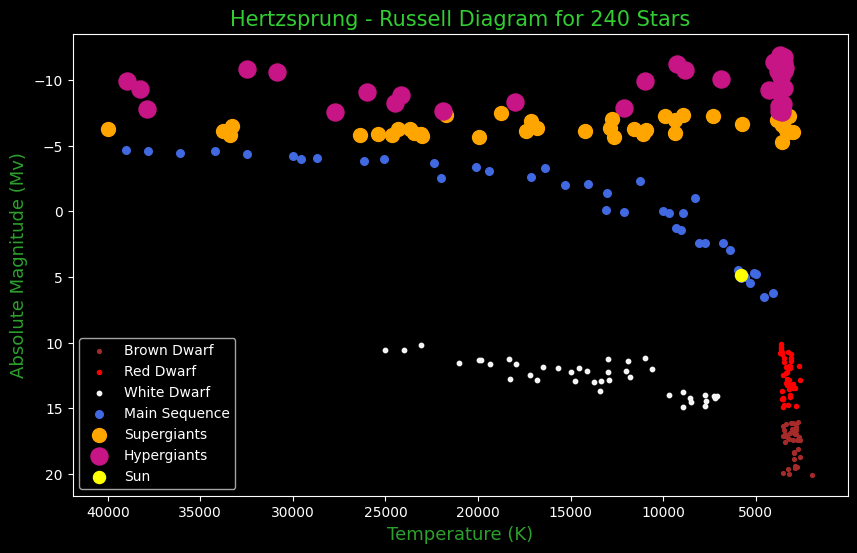

In [47]:
plt.style.use('dark_background')

plt.figure(figsize=(10,6))
axes = []
labels = set()

# For every star in the data, get its properties with its star_type
for i in range(len(star_type)):
  properties = star_types[star_type[i]]

# If label isn't in set labels, create the axis and add it to the axes list. Add the label to the labels set.
  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i],abs_magnitude[i],s=properties['size'],c=properties['color'],marker=properties['marker'],label=properties['label'])

    axes.append(ax)
    labels.add(properties['label'])

  else:
    plt.scatter(temperature[i],abs_magnitude[i],s=properties['size'],c=properties['color'],marker=properties['marker'],label=properties['label'])


#Data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='limegreen')

# Labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:green')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:green')

# Displaying the type of star
plt.legend(handles=axes)

# Get current axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig(base_dir+'hr_diagram.png')
plt.show()